# Milestone 1: Exploratory Data Analysis

**Authors**: __Khizer Zakir & Rodrigo Brust Santos__

__October 2023__

## 2. Visual Exploration


### Description 

In this section, our focus is on exploring various visualizations applied to the general dataset, as well as specifically to the training and testing sets. These visualizations include correlation matrices, scatter plots, and univariate plots, both in their original form and after applying log transformations. The objective is to gain a comprehensive understanding of the relationships and distributions within the explanatory variables. These visualizations serve as a foundational step in the decision-making process for subsequent preprocessing steps.

The correlation matrix provides insights into the interdependencies among variables, highlighting potential patterns and relationships. Scatter plots offer a visual representation of how individual variables relate to one another, especially concerning the target variable. Univariate plots, on the other hand, focus on the distribution of individual variables, shedding light on their statistical characteristics.

By examining both the original and log-transformed versions of the plots, we aim to discern any patterns or trends that may not be immediately apparent. This visual exploration sets the stage for a deeper dive into the statistical properties of the dataset. Concepts and details derived from this visualization section will play a pivotal role in guiding subsequent preprocessing steps, ensuring that our data preparation aligns with the inherent characteristics and nuances revealed through visual inspection.

In [4]:
#!pip install tabulate

In [49]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from tabulate import tabulate
import warnings
import folium

warnings.filterwarnings('ignore')

In [3]:
# original dataset to see the distribution of the data 

file_path = '../dataset/stream_samples_cleaned.csv'
df = pd.read_csv(file_path)
df.head()


x        y  Ag (ppm)  Al (%)  As (ppm)  Ba (ppm)  Be (ppm)  Bi (ppm)  \
0  248757  7972050      0.03    2.63       4.0      76.0       1.0      0.31   
1  244460  7973135      0.02    1.93       2.0      84.0       1.7      0.29   
2  244044  7970217      0.04    1.47       3.0      70.0       0.7      0.19   
3  242895  7970593      0.05    1.72      23.0      80.0       1.1      0.32   
4  242999  7971416      0.04    0.97       7.0      56.0       0.5      0.22   

   Ca (%)  Cd (ppm)  ...  Sn (ppm)  Sr (ppm)  Th (ppm)  Ti (%)  U (ppm)  \
0    0.05      0.03  ...       1.5       3.3       7.4    0.03     0.70   
1    0.04      0.01  ...       1.6       3.1       8.2    0.06     0.94   
2    0.11      0.06  ...       0.9       3.9       5.4    0.04     0.65   
3    0.04      0.08  ...       1.1       3.1       6.9    0.04     1.01   
4    0.03      0.05  ...       0.7       2.5       5.7    0.05     0.82   

   V (ppm)  W (ppm)  Y (ppm)  Zr (ppm)  Zn (ppm)  
0       73      0.3    13.15       6.3        27  
1       58      0.3    23.90       6.9        58  
2       55      0.2    10.40       1.8        34  
3       66      0.7     9.34       4.1        27  
4       41      0.4     7.45       1.5        28  

[5 rows x 44 columns]


### 2.1 Visualizing the Dataset
Provide a few figures to help understand the dataset.


#### Figure 1: Correlation Matrix Explanation

In [24]:
def plot_correlation_heatmap(df, name = 'df'):

    plt.figure(figsize=(15,12))

    corr_mat_train = df.corr()

    # Create a mask to hide the upper triangle
    mask = np.triu(corr_mat_train)

    # Heatmap plotting
    sns.heatmap(corr_mat_train, cmap='coolwarm',
                linewidths=.5, mask=mask,
                cbar_kws={"shrink": 0.7})

    plt.title(f"Correlation Matrix for {name} Data", fontsize=16)

    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, ha='right', fontsize=10)

    plt.show()

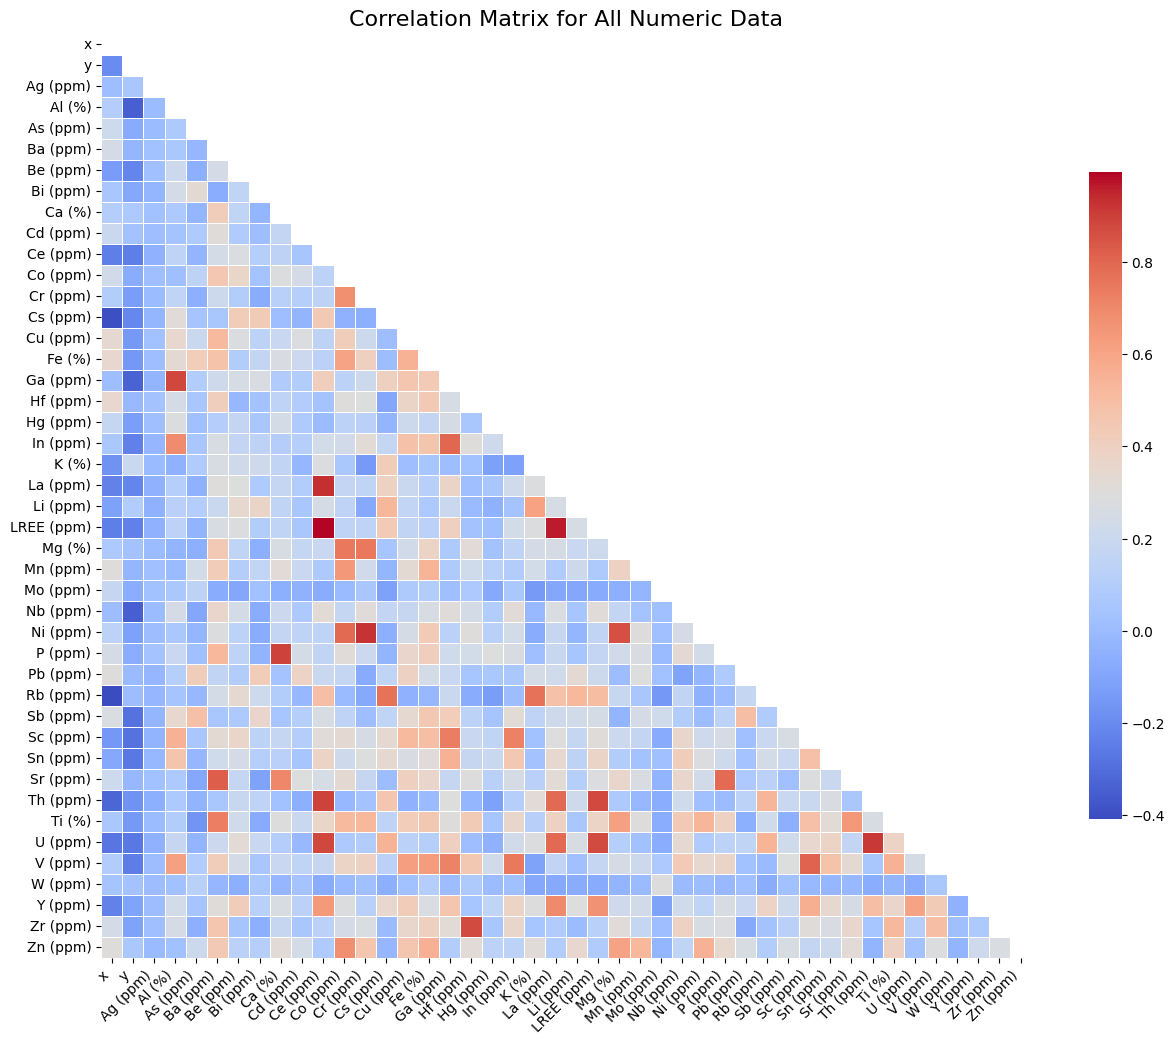

In [25]:
plot_correlation_heatmap(df, name = 'All Numeric')

**Interpretation**

This figure is extremely essential for understanding the relationship between all the variables. Mostly, it is assumed that all the variables, especially the explanantory variables preferably be independent to help train the model to perform well against an unseen data. Although there are some red patches in between, the data looks really good to explain the target variable `Zn`. In our used case, some of the stronger correlations are inevitable given the chemical associations of a few elements in their respective outcrops. This plot along with the following plots help use identify the main variables and the variables that we need to drop. 

High correlation among features may indicate multicollinearity, which can affect the stability and interpretability of the model. According to Sunil Kumar and Ilyoung Chong (2018), in the context of machine learning, it's often desirable to have features that are moderately correlated with the target but not highly correlated with each other. In our case, there are a few variables that are strongly correlated with one another that will be dealt with in the other section of this project. 

_____

#### Figure 2: Histplot

In [16]:
def plot_numeric_feature_histograms(df):
    # Calculate the number of subplots needed
    numeric_feature_names = df.columns
    num_features = len(numeric_feature_names)
    num_cols = 3
    num_rows = (num_features + num_cols - 1) // num_cols

    # Create subplots with specified rows and columns
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

    # Loop through numeric features and plot histograms
    for i, feature_name in enumerate(numeric_feature_names):
        row = i // num_cols
        col = i % num_cols
        sns.histplot(df[feature_name], kde=True, ax=axs[row, col], color='orange', bins=30)
        axs[row, col].set_title(f'Histogram for {feature_name}')
        axs[row, col].set_xlabel(feature_name)
        axs[row, col].set_ylabel('Frequency')

    # Hide empty subplots, if any
    for j in range(num_features, num_rows * num_cols):
        fig.delaxes(axs.flatten()[j])

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()

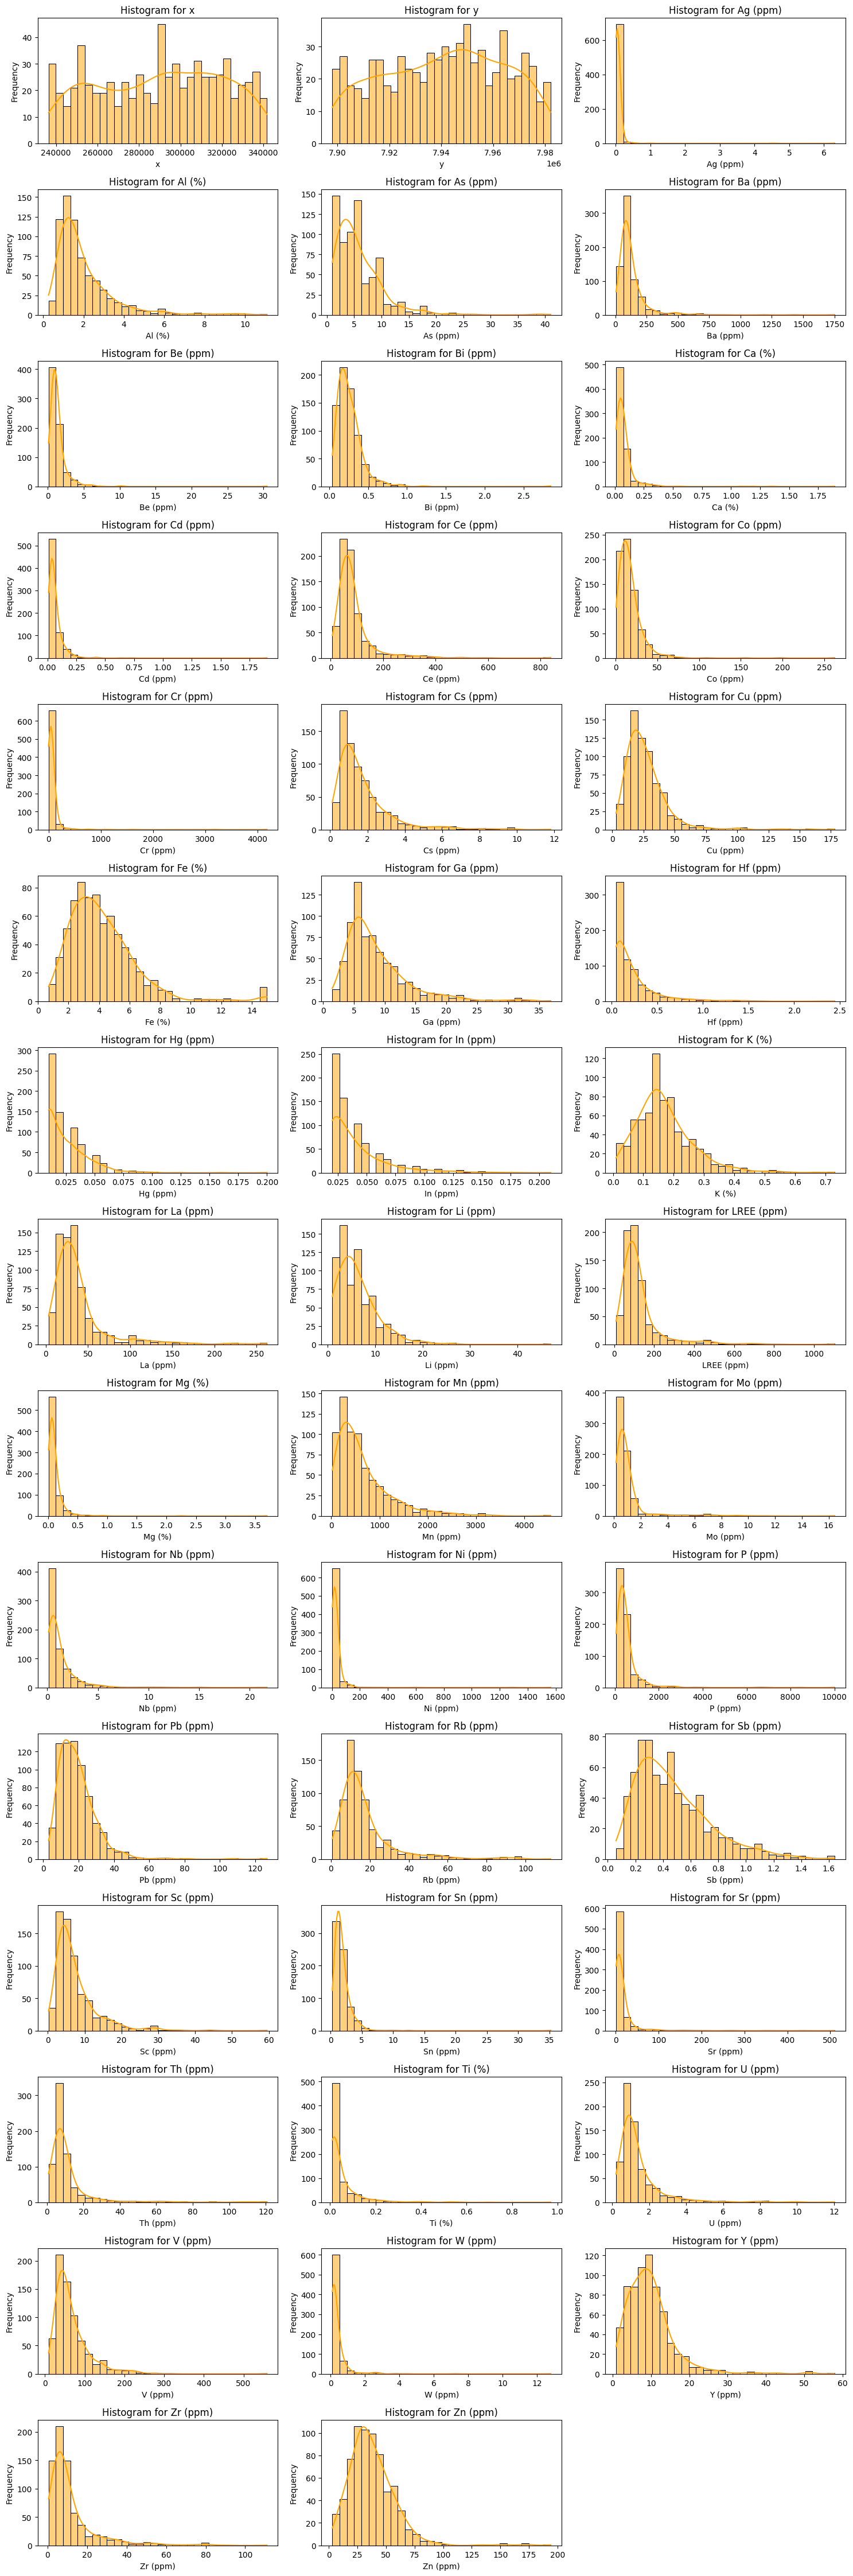

In [17]:
plot_numeric_feature_histograms(df)


**Interpretation**

These subplots demonstrate the distribution of each variable in the dataset. Most of the variables are right/positive-skewed as appear in the distribution. We will try log-transformation on the data to see if we can handle the skewness and impact of the outliers and high variance through those plots.

In the following section we will try to look at plots for the train and test datasets - both normalized and non-normalized. The normalizing criteria has been discussed in [notebook # 01]()

_______


### Normalized Train and Test

In [15]:
#importing normalized train and test data 
training = pd.read_csv('../dataset/train_test/training.csv')
testing = pd.read_csv('../dataset/train_test/testing.csv')


### Figure 5: Log-transformed Training Data Histograms

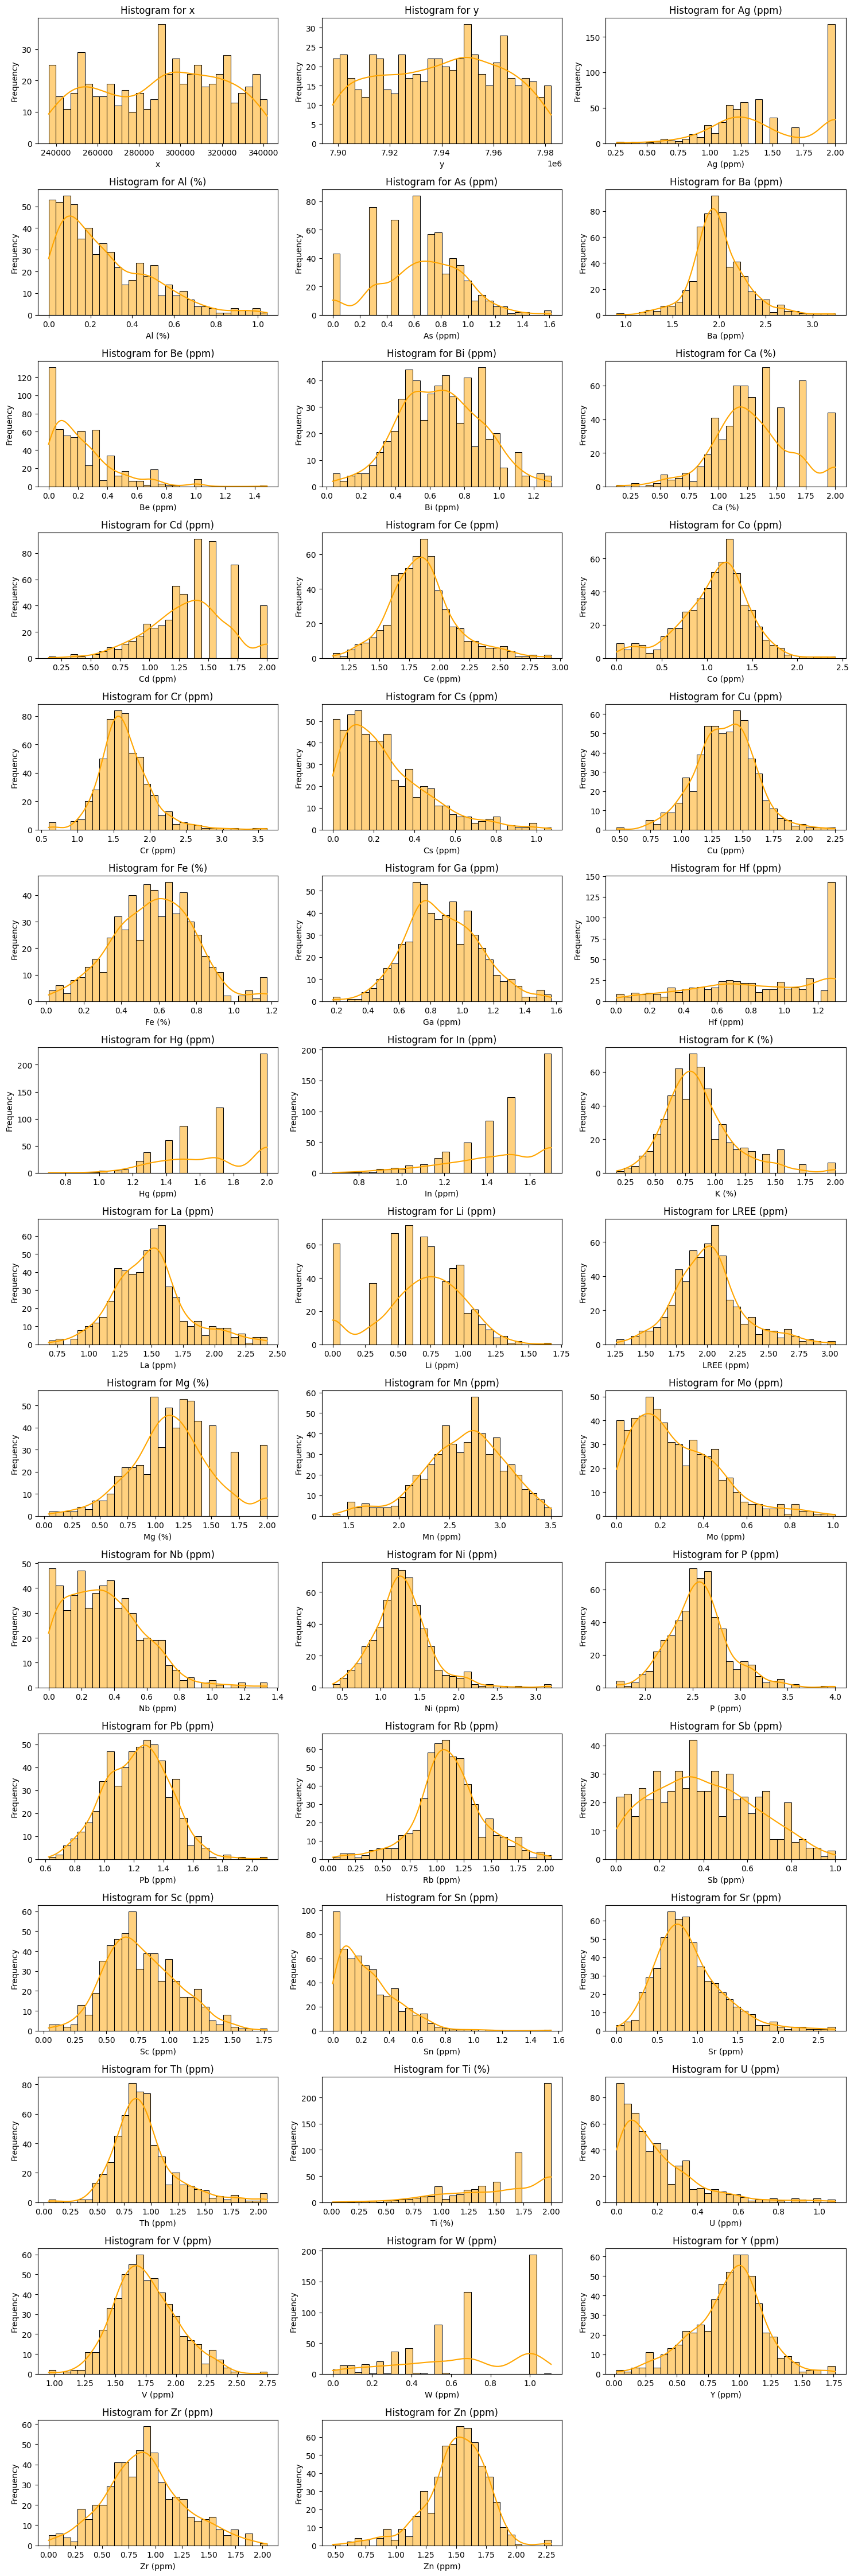

In [18]:
plot_numeric_feature_histograms(training)

**Interpretation**

The log transformed plots demonstrate much better distribution. A good amount of them appears in a normal distribuition.

___

### Figure 6: Log-transformed Testing Data Histograms

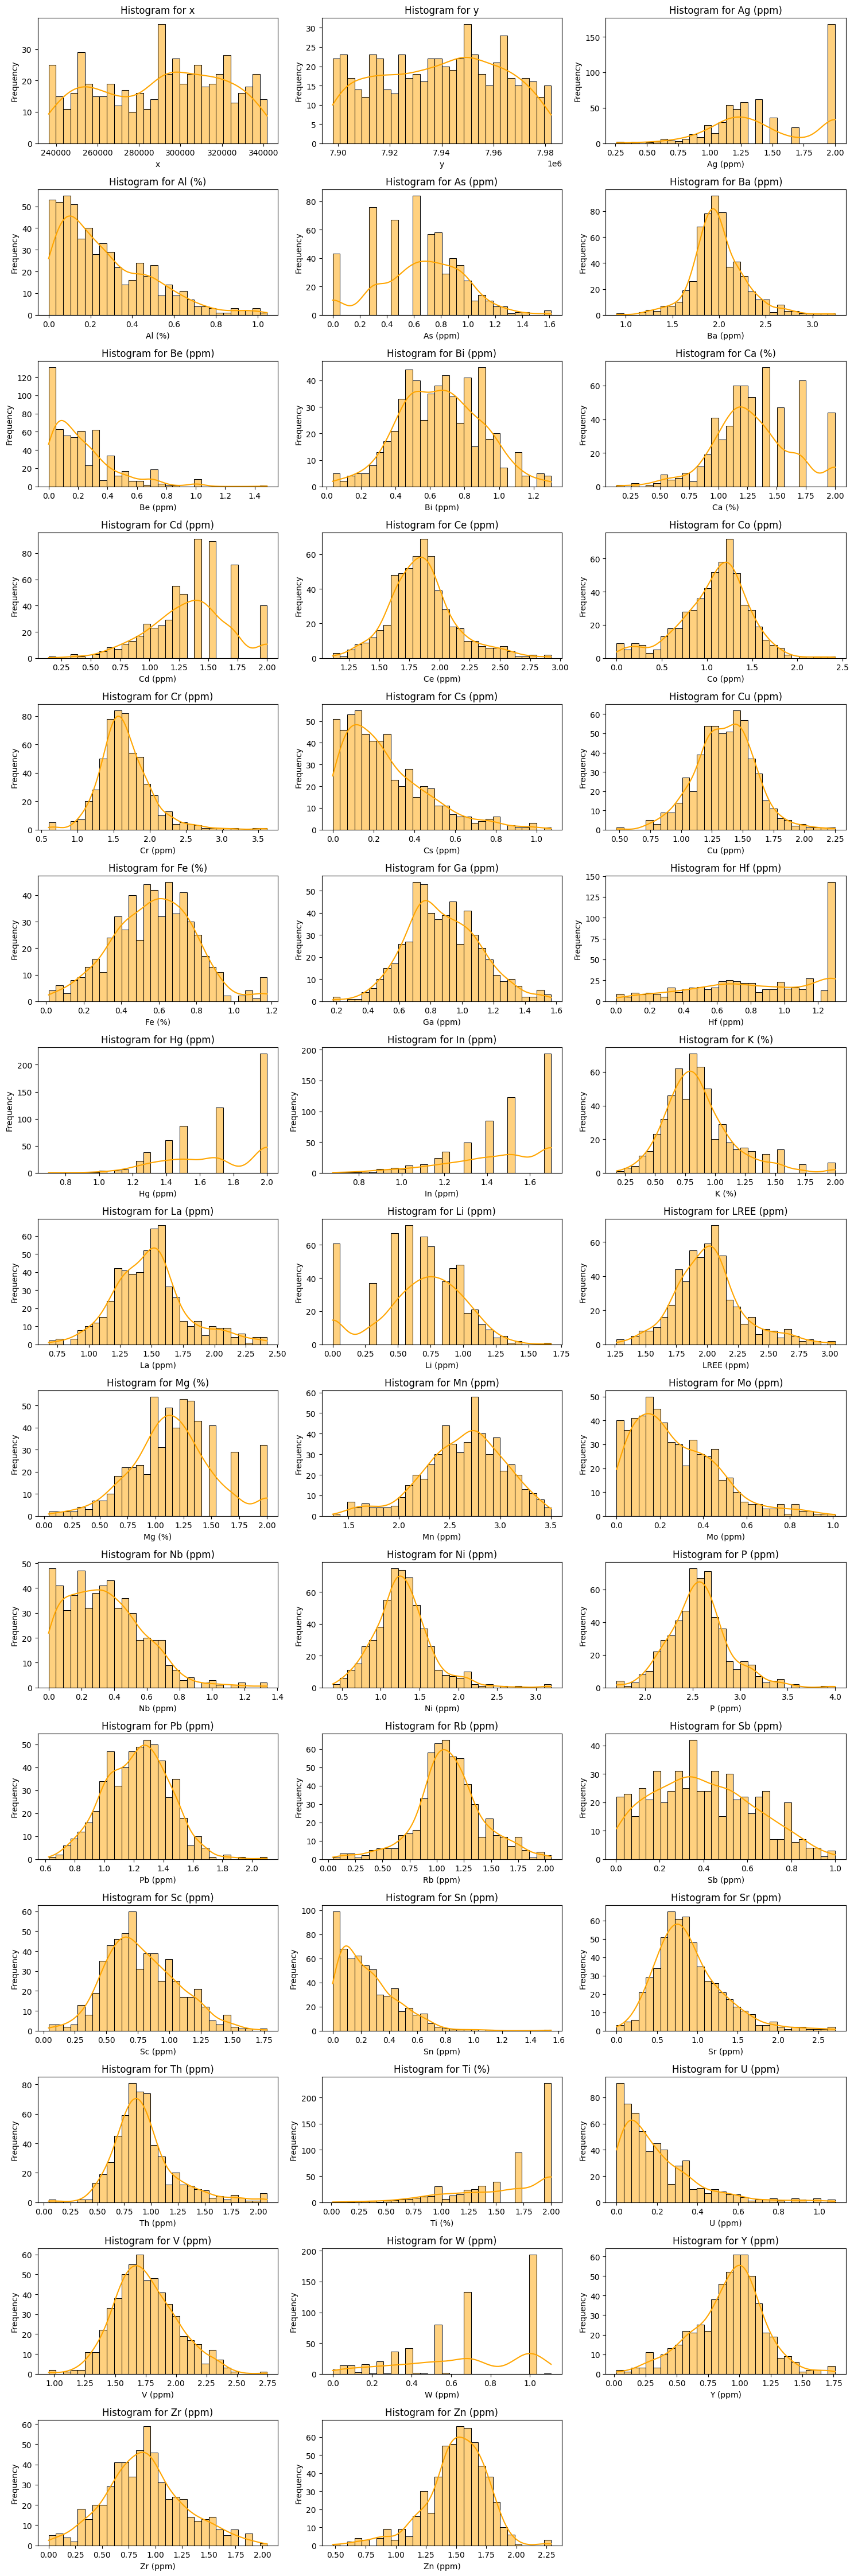

In [19]:
plot_numeric_feature_histograms(training)

**Interpretation**

This plot really helped to understand the distribution of the data values and handle the effect of outliers, high variance and the skewness of the data. This transformation is crucial as it aids the selection of important variables for the later stages.

______

#### Figure 7: Correlation plot for the log-normalized training data

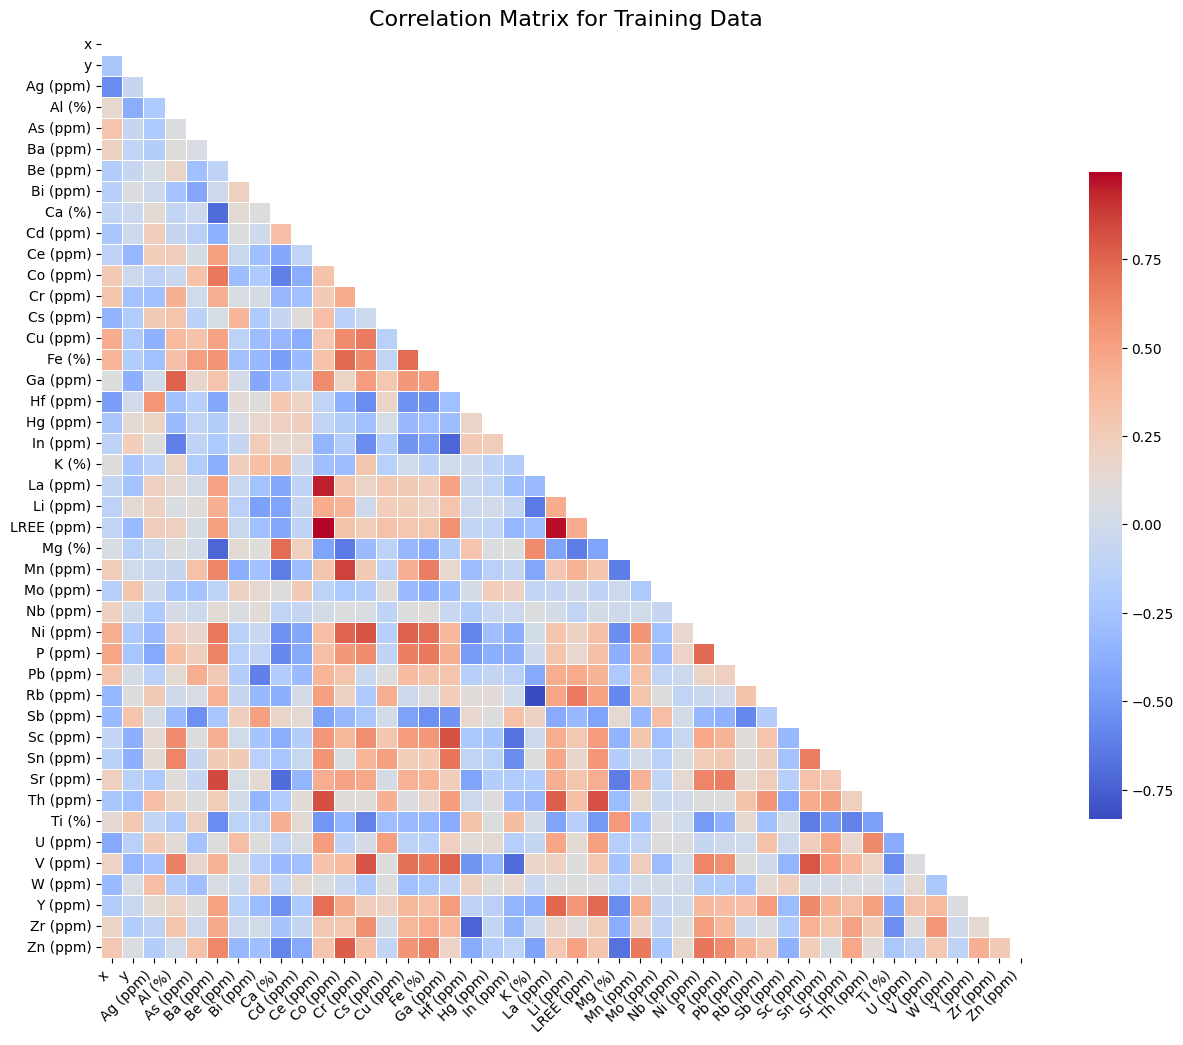

In [26]:
plot_correlation_heatmap(training, name = 'Training')

**Interpretation**

The correlation values after the normalization have changed a slight bit. However, the correlation is not very strong to create strong influence on the targer variable.

_____ 

#### Figure 8: Correlation plot for the normalized test data


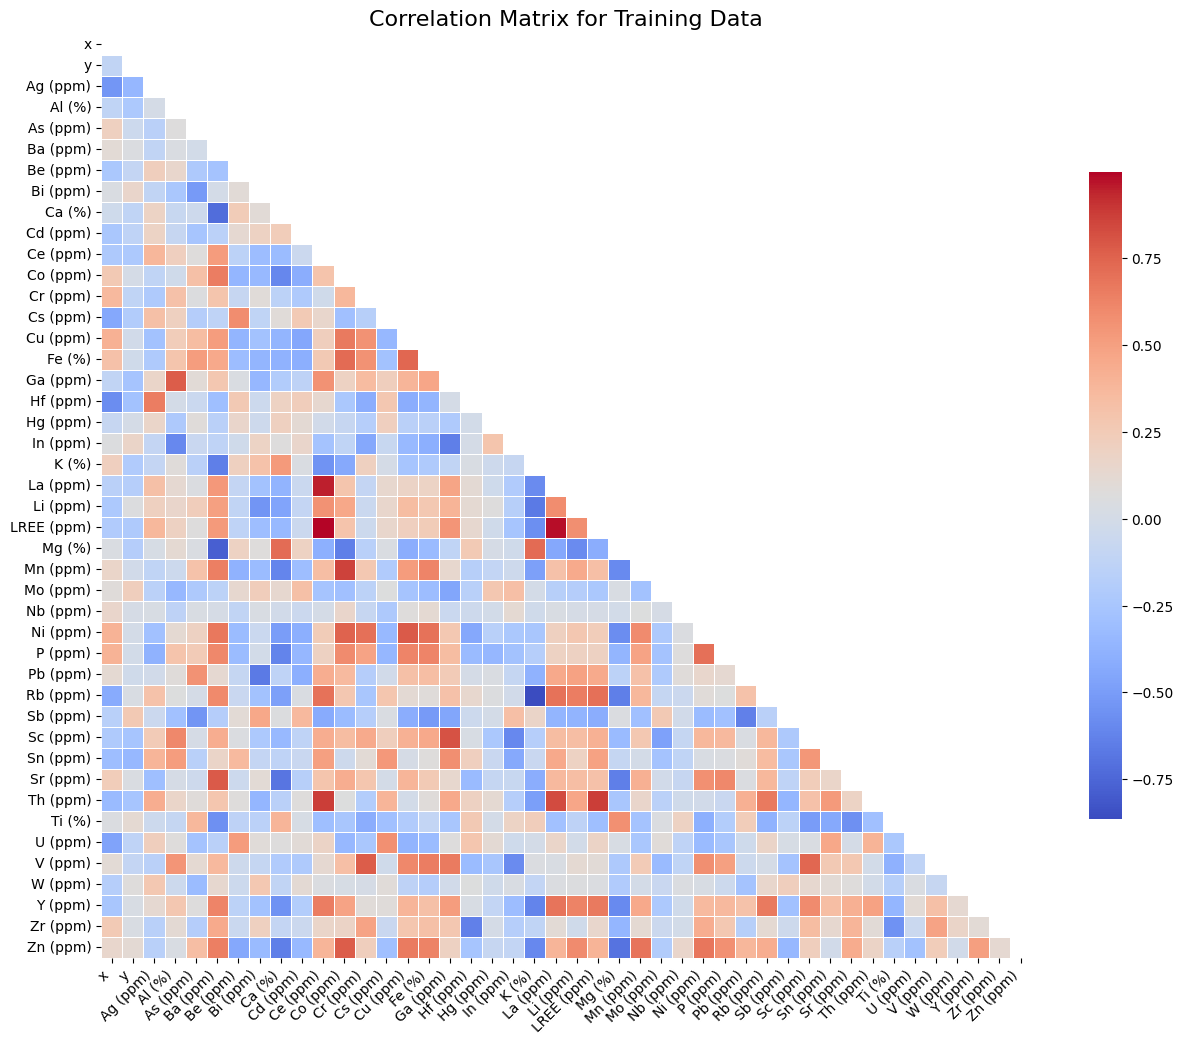

In [28]:
plot_correlation_heatmap(testing, name = 'Training')

**Interpretation**

The consistency between test and train is a good indication to train a better model. 

### Figure 9: Scatter Plots for normalized test and train

The consistency in the scatter plots for normalized test and train set. 

In [29]:
def plot_scatterplots(df):
    X = df.iloc[:, :-1]
    y = df['Zn (ppm)']

    # Calculate the number of subplots needed
    num_rows = len(df.columns) // 3 + (len(df.columns) % 3 > 0)
    fig, axs = plt.subplots(num_rows, 3, figsize=(15, 3 * num_rows))

    # Flatten the axs array for easy indexing
    axs = axs.flatten()

    # Loop through feature names and plot scatterplots
    for i, feature_name in enumerate(X.columns):
        axs[i].scatter(X[feature_name], y, s=10)
        axs[i].set_title(f'Scatterplot for {feature_name} and Zn (ppm)')
        axs[i].set_xlabel(feature_name)
        axs[i].set_ylabel('Zn (ppm)')

    # Remove empty subplots, if any
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()

# Example usage:
# plot_scatterplots(training)


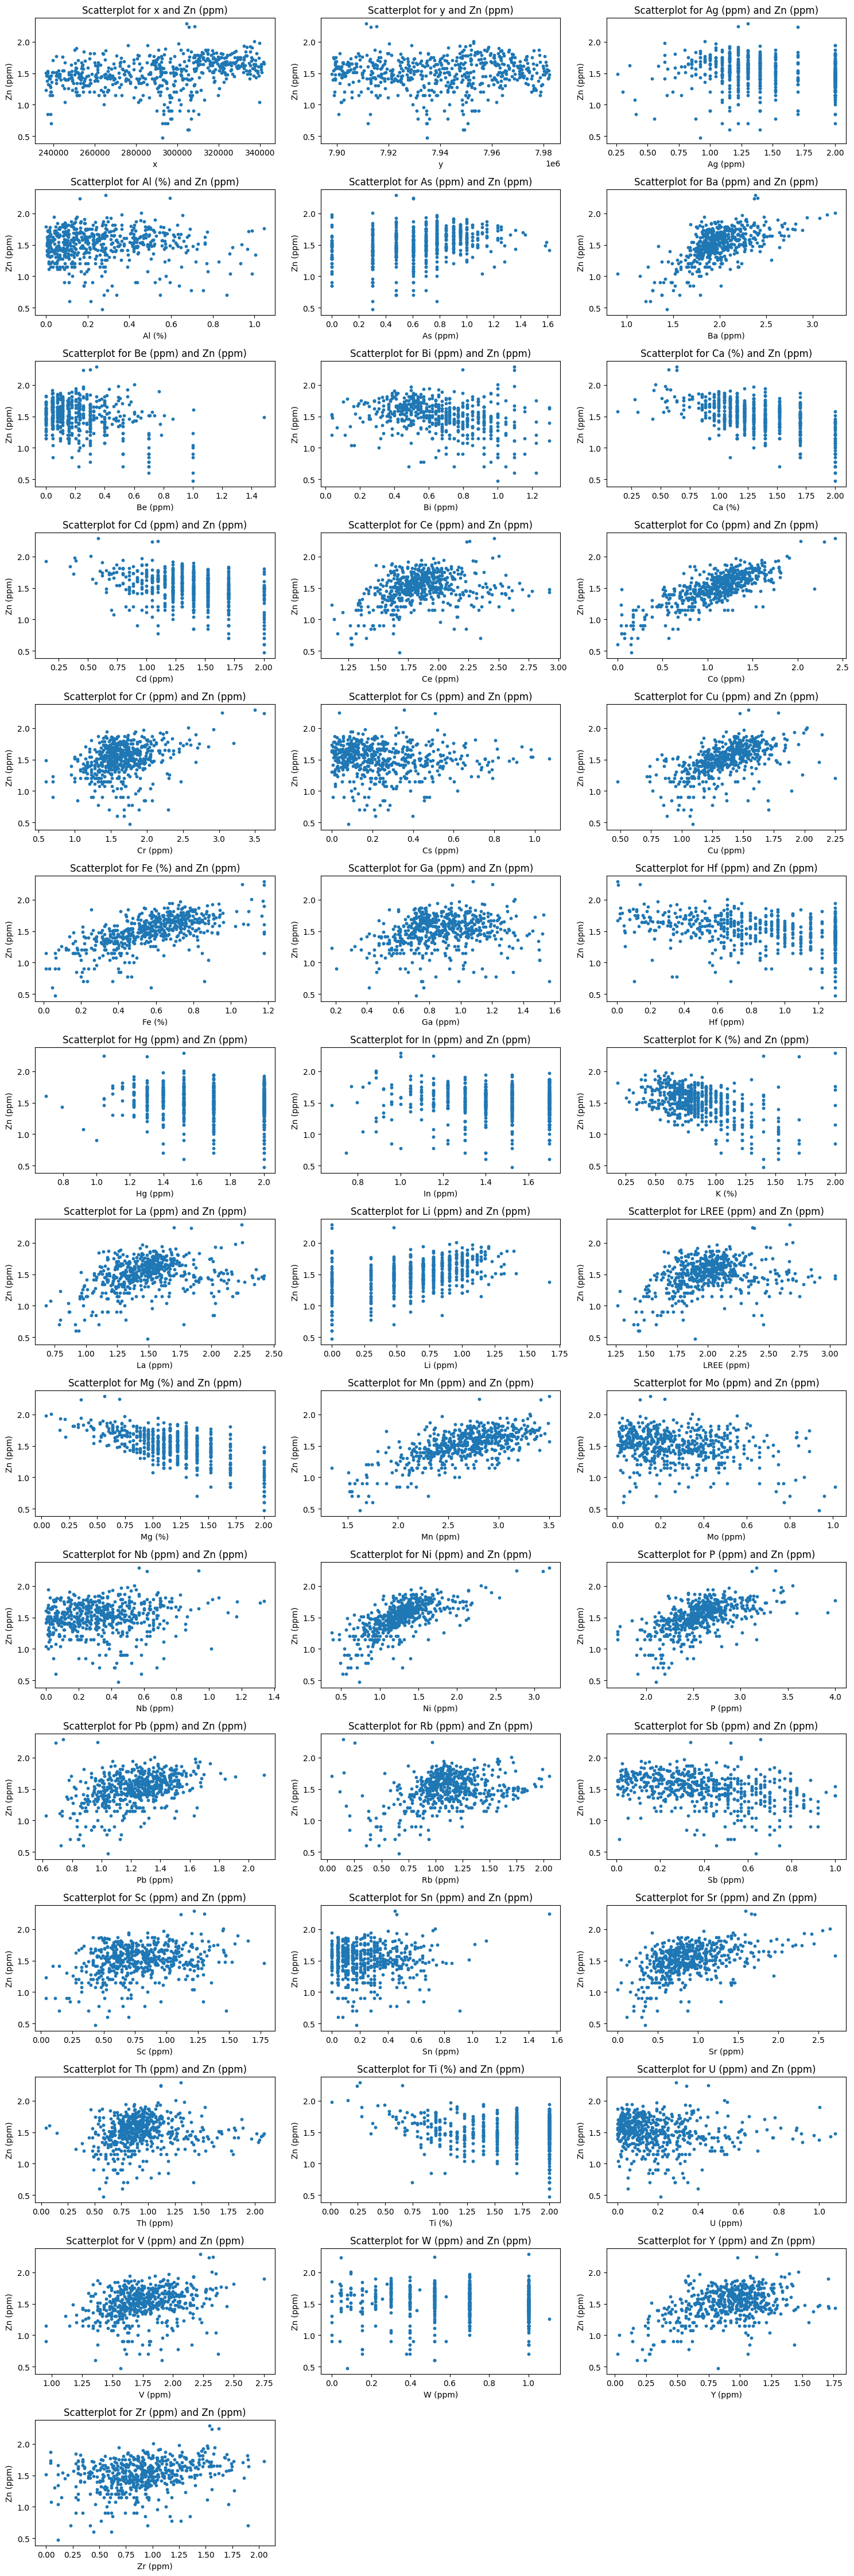

In [30]:
plot_scatterplots(training)

### Geographic visualization of the data

<Axes: >

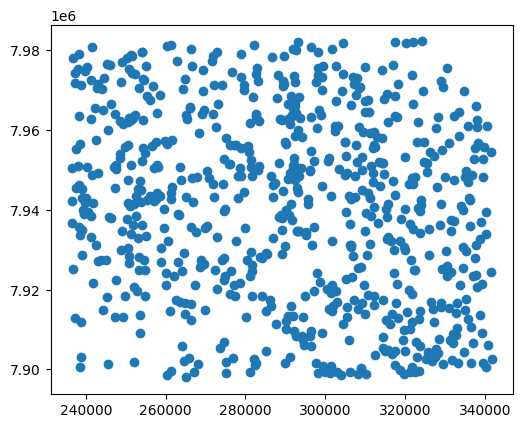

In [59]:
df.head()

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y), crs = 'EPSG:31983')

gdf.plot()

In [60]:
#-- transforming crs

gdf = gdf.to_crs(epsg = 4326)

In [63]:
gdf.explore()